# Difference in Differences with scikit-learn models

In [1]:
from sklearn.linear_model import LinearRegression

import causalpy as cp

In [2]:
data = cp.load_data("did")

In [3]:
result = cp.DifferenceInDifferences(
    data,
    formula="y ~ 1 + group*post_treatment",
    time_variable_name="t",
    group_variable_name="group",
    model=LinearRegression(),
)

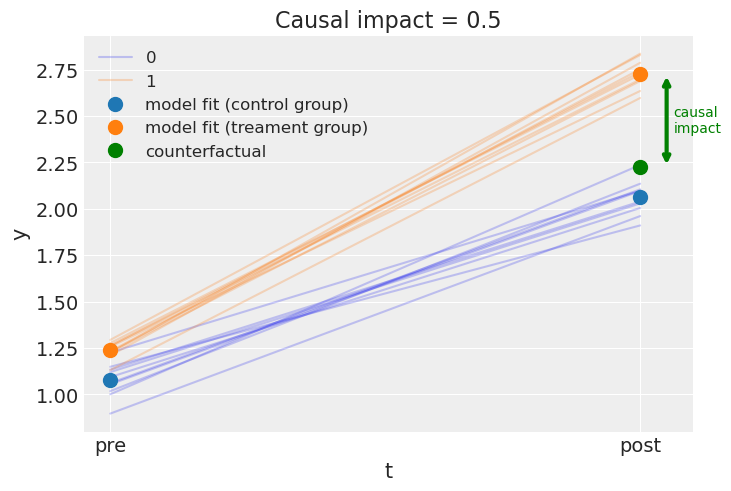

In [4]:
fig, ax = result.plot(round_to=3)

In [5]:
result.summary(round_to=3)

===========================Difference in Differences============================
Formula: y ~ 1 + group*post_treatment

Results:
Causal impact = 0.50
Model coefficients:
  Intercept                   	      1.08
  post_treatment[T.True]      	     0.986
  group                       	     0.162
  group:post_treatment[T.True]	     0.504


## Effect Summary Reporting

For decision-making, you often need a concise summary of the causal effect. The `effect_summary()` method provides a decision-ready report with key statistics. Note that for Difference-in-Differences, the effect is a single scalar (average treatment effect), unlike time-series experiments where effects vary over time.

:::{note}
**OLS vs PyMC Models**: When using OLS models (scikit-learn), the `effect_summary()` provides **confidence intervals** and **p-values** (frequentist inference), rather than the posterior distributions, HDI intervals, and tail probabilities provided by PyMC models (Bayesian inference). OLS tables include: mean, CI_lower, CI_upper, and p_value, but do not include median, tail probabilities (P(effect>0)), or ROPE probabilities.
:::


In [6]:
# Generate effect summary
stats = result.effect_summary()
stats.table

,mean,ci_lower,ci_upper,p_value
treatment_effect,0.504334,0.407876,0.600792,1.267209e-12


In [7]:
# View the prose summary
print(stats.text)

The treatment effect was 0.50 (95% CI [0.41, 0.60]), with a p-value of 0.000.


In [8]:
# You can specify the direction of interest (e.g., testing for an increase)
stats_increase = result.effect_summary(direction="increase")
stats_increase.table

,mean,ci_lower,ci_upper,p_value
treatment_effect,0.504334,0.407876,0.600792,1.267209e-12
